In [ ]:
#import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#load the dataset
data = pd.read_csv('Maternal_Health.csv')

#Initial EDA
print(data.head())

print(data.shape)

print(data.dtypes)

print(data.describe())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
(1014, 7)
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.

In [ ]:
#data cleaning
#check missing values
missing_values = data.isnull().sum()
print('missing values:\n', missing_values)

missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
#check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)

562


In [ ]:
#EDA
#Which variables are most strongly correlated with RiskLevel?
# Convert Categorical column 'RiskLevel' to numerical for analysis
data['RiskLevel'] = data['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})

correlation = data.corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                   Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798   
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108   
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151   
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867   
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771   
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000   
RiskLevel    0.267225    0.396473     0.346649  0.569942  0.163984   0.194312   

             RiskLevel  
Age           0.267225  
SystolicBP    0.396473  
DiastolicBP   0.346649  
BS            0.569942  
BodyTemp      0.163984  
HeartRate     0.194312  
RiskLevel     1.000000  


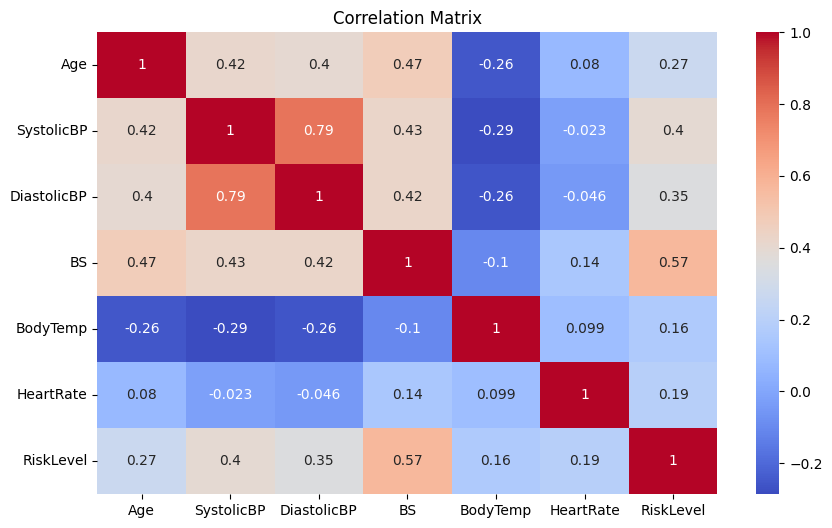

In [ ]:
#heat map
plt.figure(figsize =(10, 6))
sns.heatmap(correlation, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Examine how Age impacts RiskLevel.
grouped = data.groupby('Age')['RiskLevel'].mean()
print("Grouped Data by Age:\n", grouped)

Grouped Data by RiskLevel:
 Age
10    0.500000
12    0.771429
13    1.083333
14    2.000000
15    0.066667
16    0.375000
17    1.095238
18    0.578947
19    0.611940
20    0.500000
21    0.289474
22    0.488889
23    0.478873
24    0.000000
25    1.104167
26    1.000000
27    0.666667
28    0.928571
29    1.150000
30    1.133333
31    0.681818
32    1.000000
33    1.400000
34    1.200000
35    1.020000
36    1.500000
37    2.000000
38    2.000000
39    1.500000
40    1.891892
41    0.000000
42    0.521739
43    1.600000
44    1.000000
45    0.222222
46    2.000000
48    1.461538
49    0.666667
50    1.395349
51    0.000000
54    1.750000
55    1.135135
56    2.000000
59    0.000000
60    0.823529
62    0.000000
63    2.000000
65    0.666667
66    0.000000
70    0.000000
Name: RiskLevel, dtype: float64


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

# Create a new Age Group column
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate normalized RiskLevel distribution
risk_by_age = data.groupby('Age_Group')['RiskLevel'].value_counts(normalize=True).unstack()

print("Risk Level by Age Group:\n", risk_by_age)

Risk Level by Age Group:
 RiskLevel         0         1         2
Age_Group                              
0-10       0.000000  0.000000  0.000000
10-20      0.498208  0.362007  0.139785
20-30      0.459283  0.390879  0.149837
30-40      0.306818  0.312500  0.380682
40-50      0.298246  0.166667  0.535088
50-60      0.208333  0.281250  0.510417
60-70      0.414634  0.341463  0.243902


<ipython-input-26-73b45bfd114e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age = data.groupby('Age_Group')['RiskLevel'].value_counts(normalize=True).unstack()


<Figure size 1000x600 with 0 Axes>

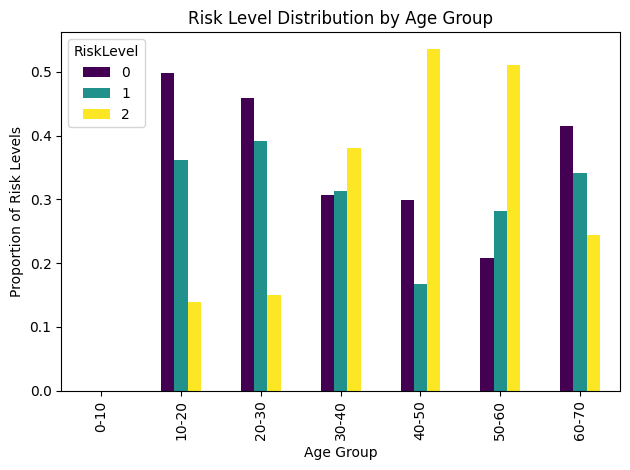

In [ ]:
plt.figure(figsize=(10, 6))
risk_by_age.plot(kind='bar', colormap='viridis')
plt.title('Risk Level Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Risk Levels')
plt.legend(title='RiskLevel', loc='upper left')
plt.tight_layout()
plt.show()

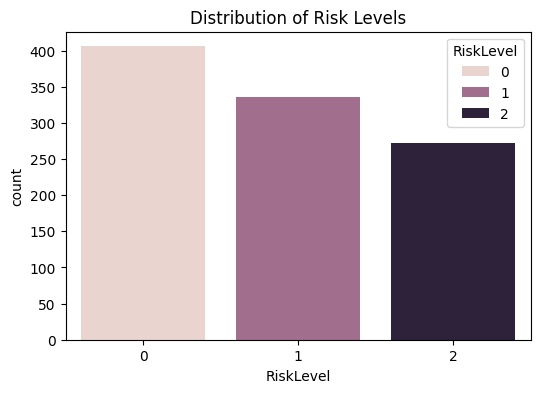

In [ ]:
# Risk level distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='RiskLevel', hue='RiskLevel')
plt.title('Distribution of Risk Levels')
plt.show()

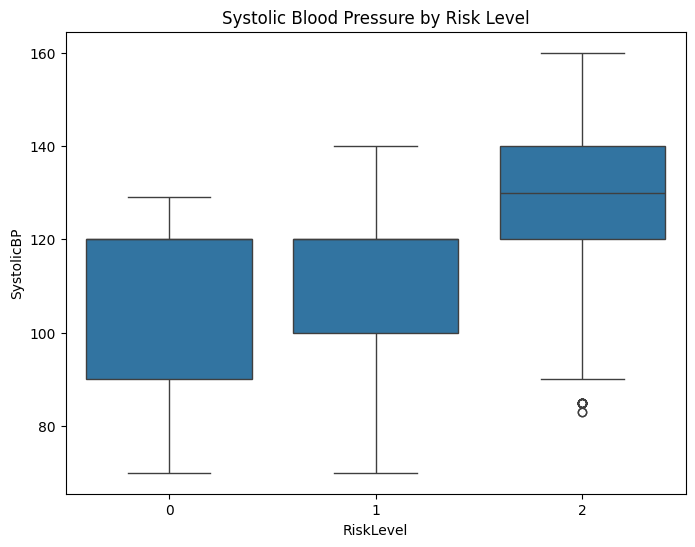

In [ ]:
# Boxplot for Blood Pressure by RiskLevel
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='RiskLevel', y='SystolicBP')
plt.title('Systolic Blood Pressure by Risk Level')
plt.show()

In [ ]:
#Hypothesis testing
#Is there a significant association between blood sugar levels and the maternal risk level?
#Null Hypothesis: Blood sugar levels are not significantly associated with maternal risk levels.
#Alternative Hypothesis: Blood sugar levels are significantly associated with maternal risk levels.

#segment the data
low_risk = data[data['RiskLevel'] == 0]['BS'],
mid_risk = data[data['RiskLevel'] == 1]['BS'],
high_risk = data[data['RiskLevel'] == 2]['BS']

# Number of patients in each group
low_risk = data[data['RiskLevel'] == '0']['BS'].sum()
mid_risk = data[data['RiskLevel'] == '1']['BS'].sum()
high_risk = data[data['RiskLevel'] == '2']['BS'].sum()

print(low_risk)
print(mid_risk)
print(high_risk)

0.0
0.0
0.0


In [ ]:
## Analyze completion rates - Categorical in nature - Chi-square test
## Generate a contingency table
contingency_table = pd.crosstab(data['RiskLevel'], data['BS'])

print(contingency_table)

## Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-square:{chi2}, P-value:{p_value}")

BS         6.0   6.1   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.0   ...  \
RiskLevel                                                              ...   
0             7    32     0     8     1     2    10    37    47    29  ...   
1            14    19     0     2     0     0    23    41    58    41  ...   
2             0     2     2     0     0     0     0    10     8     9  ...   

BS         9.0   10.0  11.0  12.0  13.0  15.0  16.0  17.0  18.0  19.0  
RiskLevel                                                              
0             0     0     4     0     0     0     0     0     0     0  
1            19     0     8     6     0     5     9     0     4     0  
2            12     4    40    12     9    49     8     5    25    22  

[3 rows x 29 columns]
Chi-square:663.1293498794671, P-value:1.1439698573934811e-104


In [ ]:
#Interpretation
if p_value < 0.05:
    print("There is a significant association between blood sugar levels and maternal risk levels.")
else:
    print("Blood sugar levels are not significantly associated with maternal risk levels.")

There is a significant association between blood sugar levels and maternal risk levels.
